# Explorando a API COVID19Py

In [1]:
import COVID19Py

In [2]:
covid19 = COVID19Py.COVID19(data_source="jhu")

In [3]:
covid19

In [4]:
latest = covid19.getLatest()
latest

{'confirmed': 12717908, 'deaths': 565138, 'recovered': 0}

## Obtendo o dados de um pais especifico

In [5]:
pais = covid19.getLocationByCountryCode("US", timelines=True)

In [6]:
#pais

In [7]:
#pais[0]['timelines']

In [8]:
#pais[0]['timelines']

In [9]:
#pais[0]['timelines']['confirmed']['timeline']

# Gerando a dataFrame com os dados obtidos

In [10]:
import pandas as pd
from datetime import date,  datetime

## Casos comfirmados

In [11]:
def tranforma_data(date_str):
    dt = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%SZ')
    data_nova = date(dt.year, dt.month, dt.day).strftime("%d/%m/%Y") 
    return data_nova

In [12]:
casos_confirmados = pd.DataFrame(data = pais[0]['timelines']['confirmed'])
# removendo coluna latest
del casos_confirmados['latest']

# tranformado o index em coluna 
casos_confirmados['Data'] = casos_confirmados.index
#casos_confirmados.index = range(casos_confirmados.shape[0])

# renomeando as colunas
casos_confirmados.columns = ['Casos', 'Data']

# modifica o formato da data
casos_confirmados['Data'] = casos_confirmados['Data'].apply(tranforma_data)

#casos_confirmados.reset_index(level=0, inplace=True)

# selecioando apenas com os com valores acima de 100 casos comfimados
selecao = casos_confirmados.Casos > 200
casos_confirmados = casos_confirmados[selecao]

# reiniciando o index
casos_confirmados.index = range(casos_confirmados.shape[0])

casos_confirmados.head()

,Casos,Data
0,222,06/03/2020
1,337,07/03/2020
2,451,08/03/2020
3,519,09/03/2020
4,711,10/03/2020


## Mortes comfirmadas

In [13]:
mortes_confirmados = pd.DataFrame(data = pais[0]['timelines']['deaths'])
# removendo coluna latest
del mortes_confirmados['latest']

# tranformado o index em coluna e reiniciando o index
mortes_confirmados['Data'] = mortes_confirmados.index

# renomeando as colunas
mortes_confirmados.columns = ['Mortes', 'Data']

# modifica o formato da data
mortes_confirmados['Data'] = mortes_confirmados['Data'].apply(tranforma_data)

# selecionando apenas com os com valores acima de 100 casos comfimados
mortes_confirmados = mortes_confirmados[selecao]

# reiniciando o index
mortes_confirmados.index = range(mortes_confirmados.shape[0])

mortes_confirmados.head()

,Mortes,Data
0,14,06/03/2020
1,17,07/03/2020
2,21,08/03/2020
3,22,09/03/2020
4,28,10/03/2020


In [14]:
casos_e_mortes_confirmados = pd.DataFrame([casos_confirmados.Data,
                                           casos_confirmados.Casos, 
                                           mortes_confirmados.Mortes]).transpose()
casos_e_mortes_confirmados['Dias'] = casos_e_mortes_confirmados.index
casos_e_mortes_confirmados.head()

,Data,Casos,Mortes,Dias
0,06/03/2020,222,14,0
1,07/03/2020,337,17,1
2,08/03/2020,451,21,2
3,09/03/2020,519,22,3
4,10/03/2020,711,28,4


# Media movel de 3

In [15]:
casos_e_mortes_confirmados['Casos_Media_3'] = casos_e_mortes_confirmados['Casos'].rolling(3, min_periods=1).mean()
casos_e_mortes_confirmados['Mortes_Media_3'] = casos_e_mortes_confirmados['Mortes'].rolling(3, min_periods=1).mean()

In [16]:
casos_e_mortes_confirmados.head()

,Data,Casos,Mortes,Dias,Casos_Media_3,Mortes_Media_3
0,06/03/2020,222,14,0,222.000000,14.000000
1,07/03/2020,337,17,1,279.500000,15.500000
2,08/03/2020,451,21,2,336.666667,17.333333
3,09/03/2020,519,22,3,435.666667,20.000000
4,10/03/2020,711,28,4,560.333333,23.666667


In [17]:
casos_e_mortes_confirmados['Taxa_Casos_Media_3'] = None
casos_e_mortes_confirmados['Taxa_Mortes_Media_3'] = None

In [18]:
for i in range(len(casos_e_mortes_confirmados) - 1):
    dx = casos_e_mortes_confirmados.loc[i+1,'Casos_Media_3'] - casos_e_mortes_confirmados.loc[i, 'Casos_Media_3']
    casos_e_mortes_confirmados.loc[i,'Taxa_Casos_Media_3'] = dx
    
    dx = casos_e_mortes_confirmados.loc[i+1, 'Mortes_Media_3'] - casos_e_mortes_confirmados.loc[i, 'Mortes_Media_3']
    casos_e_mortes_confirmados.loc[i,'Taxa_Mortes_Media_3'] = dx

In [19]:
casos_e_mortes_confirmados.head()

,Data,Casos,Mortes,Dias,Casos_Media_3,Mortes_Media_3,Taxa_Casos_Media_3,Taxa_Mortes_Media_3
0,06/03/2020,222,14,0,222.000000,14.000000,57.5,1.5
1,07/03/2020,337,17,1,279.500000,15.500000,57.1667,1.83333
2,08/03/2020,451,21,2,336.666667,17.333333,99,2.66667
3,09/03/2020,519,22,3,435.666667,20.000000,124.667,3.66667
4,10/03/2020,711,28,4,560.333333,23.666667,219.333,3.66667


In [20]:
casos_e_mortes_confirmados.tail()

,Data,Casos,Mortes,Dias,Casos_Media_3,Mortes_Media_3,Taxa_Casos_Media_3,Taxa_Mortes_Media_3
105,19/06/2020,2222579,119124,105,2.192307e+06,118424.333333,30669,667.667
106,20/06/2020,2255297,119720,106,2.222976e+06,119092.000000,30201,515.667
107,21/06/2020,2281655,119979,107,2.253177e+06,119607.666667,29907.7,426
108,22/06/2020,2312302,120402,108,2.283085e+06,120033.666667,30575,502.667
109,23/06/2020,2347022,121228,109,2.313660e+06,120536.333333,None,None


# Plotando Gráficos

## Gráficos - Casos totais

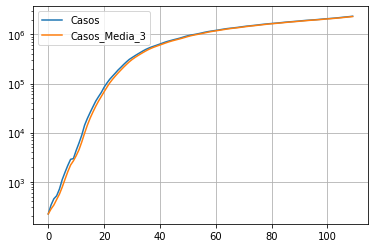

In [21]:
ax = casos_e_mortes_confirmados.plot(grid = True, y = ['Casos','Casos_Media_3' ], logy = True)
ax

## Gráficos - Mortes totais

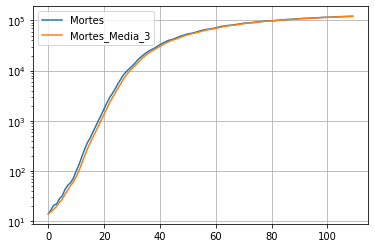

In [22]:
ax = casos_e_mortes_confirmados.plot(grid = True, y = ['Mortes', 'Mortes_Media_3'], logy = True)
ax

## Gráficos - Taxa de casos

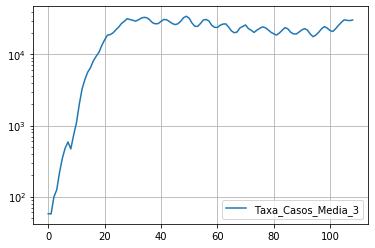

In [23]:
ax = casos_e_mortes_confirmados.plot(grid = True, y = 'Taxa_Casos_Media_3', logy = True)
ax

## Verificando todos os paises diponíveis

In [24]:
all_data = covid19.getAll()
all_data['locations']
df = pd.DataFrame(all_data['locations'])

KeyboardInterrupt: 

In [ ]:
df['country'].unique()

### Obtendo o codigos

In [ ]:
df[ df.country == 'Brazil']

In [ ]:
df[ df.country == 'Spain']

In [ ]:
df[ df.country == 'Italy']

In [ ]:
df[ df.country == 'Germany']

In [ ]:
df[ df.country == 'US']

In [ ]:
df[df.country == 'Turkey']

In [ ]:
df[df.country == 'South Africa']

In [ ]:
df[df.country == 'Korea, South']